# Knock Airport Weather Analysis

Plot:
- The temperature
- The mean temperature of each day
- The mean temperature of each month
- The windspeed
- The rolling windspeed (over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds

In [1]:
# Import the requred modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Background Information on the Data Set.

The [downloaded csv file](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) contains hourly weather information for Knock Airport, Co. Mayo, Ireland from April 1996 to October 2024. The data is published by Met Éireann, the meteorological service of Ireland.

This [link](https://cli.fusio.net/cli/climate_data/showdata.php) to view and download weather data for other weather stations. It is possible to download hourly, daily or monthly weather data for the selected station. Each weather station has a unique station name.

The naming system of the csv file reflects the data downloaded. For this file, hly4935.csv, hly indicates hourly data and 4935 is the station code for Knock Airport.

## Loading the CSV File

Difficulties loading the csv file were due to:

- the first 23 rows in the csv file have information on the Knock Weather Station and a description of the column names. This was easily solved using the skiprows parameter of the read_csv() function.
- missing data is indicated with a space, ' '.

The missing data was not read into pandas as NaN as expected. To clean the csv file find and replace in Visual Studio Code was used. Te remove the space, each ', ' (or the regex expression ',\s') was replaced with ','. 

![Find and replace for csv](img/assignment_6_regex.png)

In the pandas, read_csv() [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) I subsequently found an alternative method. Certain values are automatically interpreted as NaN by Pandas. These are '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'None', 'n/a', 'nan' and 'null '. Unfortunately, a space, ' ' is not one of them. The read_csv() function has a parameter, [na_values](https://www.geeksforgeeks.org/use-of-na_values-parameter-in-read_csv-function-of-pandas-in-python/) which allows the user to list additional strings to recognise as NaN. For this csv file, setting ``na_values = ' '`` would mean that the missing values would be automatically recognised as NaN when the data set is loaded.

A third method was detailed in the [Week 7 labs](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/lab07.01-regression%20windspeed.pdf) of the Programming for Data Analytics module. This uses the [replace method](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html#pandas.Series.replace) as shown below.

```python
# Find all rows in the 'wdsp' column, replace ' ' with np.nan.
df['wdsp'] = df.loc[:, ('wdsp')].replace(' ', np.nan)
```

__Additional References__

https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/

In [2]:
# Load the Data Set
# Loading only the date, temperature and windspeed columns as these are the columns required to complete the assignment.
# Set the date column as index. 
weather_df = pd.read_csv('data\hly4935.csv', 
                         usecols= ['date', 'temp', 'wdsp'], 
                         skiprows = 23, index_col= 'date', 
                         parse_dates= ['date'], 
                         date_format = "%d-%b-%Y %H:%M")
weather_df.head()

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0
1996-07-31 09:00:00,11.6,0.0
1996-07-31 10:00:00,12.9,0.0
1996-07-31 11:00:00,14.5,0.0


Should I drop the first line? Is the data skewed by having no data from the 10th April to the 31st July? 

## Exploratory Data Analysis

In [3]:
# Information on the data set. Check the data type, no of entries. 
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246930 entries, 1996-04-10 14:00:00 to 2024-10-01 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    246930 non-null  float64
 1   wdsp    246880 non-null  float64
dtypes: float64(2)
memory usage: 5.7 MB


In [4]:
# Summary Statistics
weather_df.describe()

,temp,wdsp
count,246930.000000,246880.000000
mean,8.763200,9.462387
std,4.609026,4.937889
min,-6.900000,0.000000
25%,5.400000,6.000000
50%,8.800000,9.000000
75%,12.000000,12.000000
max,28.500000,50.000000


In [5]:
# Shape attribute, no of rows and columns in the dataset
weather_df.shape

(246930, 2)

In [6]:
# Find the number of rows with data missing.
weather_df.isna().sum()

temp     0
wdsp    50
dtype: int64

In [7]:
# Only 50 rows with data missing in the windspeed column.
# Drop the rows with missing data
weather_df.dropna(inplace= True)

In [8]:
# Change the data type of the windspeed column to integer. The data in the csv file is recorded as whole numbers.
weather_df['wdsp'] = weather_df['wdsp'].astype('int')
weather_df['wdsp'].dtype

dtype('int32')

In [9]:
# Set style of plots
plt.style.use(style= 'seaborn-v0_8')

## Task 1: Plot the Temperature

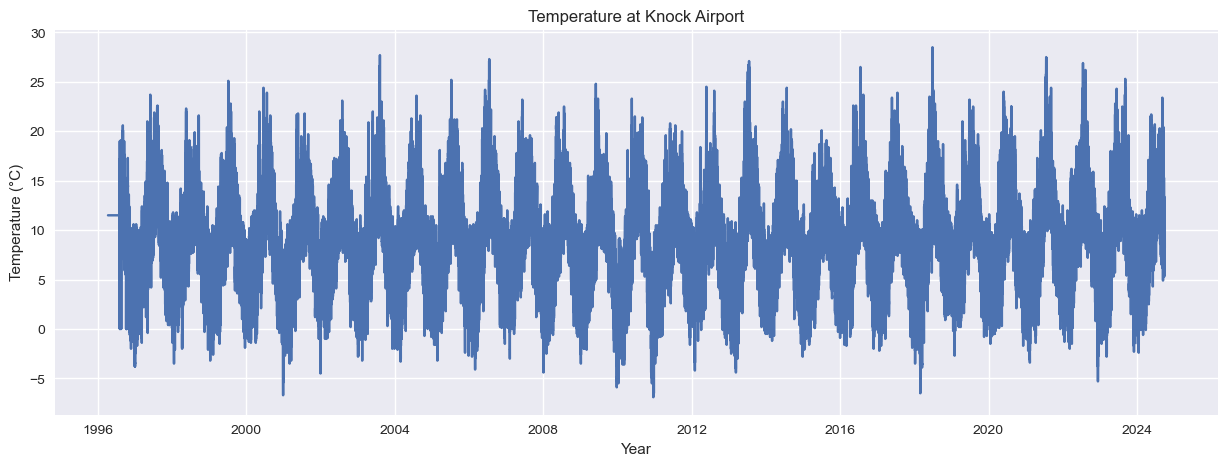

In [10]:
# Task 1: Plot the temperature.

fig, ax = plt.subplots(figsize = (15, 5))

plt.plot(weather_df['temp'])


plt.title('Temperature at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

plt.show()

In [79]:
# Take a closer look. 
tens_weather_df = weather_df.loc['2010-01-01': '2012-01-01']

Color by value. 

https://matplotlib.org/stable/gallery/color/color_by_yvalue.html#sphx-glr-gallery-color-color-by-yvalue-py

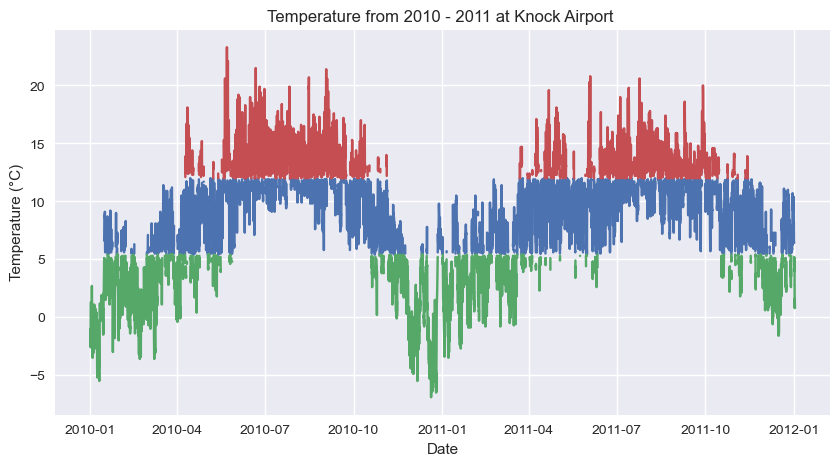

In [13]:
# Plot of the temperature from 2010 and 2011
fig, ax = plt.subplots(figsize = (10, 5))

upper = 12
lower = 5.4

supper = np.ma.masked_where(tens_weather_df['temp'] < upper, tens_weather_df['temp'])
slower = np.ma.masked_where(tens_weather_df['temp'] > lower, tens_weather_df['temp'])
smiddle = np.ma.masked_where((tens_weather_df['temp'] < lower) | (tens_weather_df['temp'] > upper), tens_weather_df['temp'])

plt.plot(tens_weather_df.index, smiddle, tens_weather_df.index, slower, tens_weather_df.index, supper)
plt.title('Temperature from 2010 - 2011 at Knock Airport ')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()



As there was no data recorded from 2pm on the 10th April 1996 to the 31st July 1996 the first row of data will be dropped as the missing data will affect the mean temperature. 

In [15]:
# Drop the first row.
weather_df.drop('1996-04-10 14:00:00', inplace= True)

## Task 2: Plot the Mean Temp Each Day

### Resampling the data

To convert the hourly readings into daily, monthly or yearly readings the resample() function can be used. Resample() function groups data within a specified time interval and then applies one or more functions to each group. It will be used to calculate the mean of the daily temperatures for Task 2.

In [46]:
# Use resample() to group weather_df to daily samples
daily = weather_df.resample('D')

In [48]:
# Get the daily mean temperature.
daily_mean_temp = daily['temp'].mean()
daily_mean_temp

date
1996-07-31    12.650000
1996-08-01    11.704348
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
                ...    
2024-09-27     8.291667
2024-09-28     8.479167
2024-09-29     9.183333
2024-09-30     9.891667
2024-10-01     8.200000
Freq: D, Name: temp, Length: 10290, dtype: float64

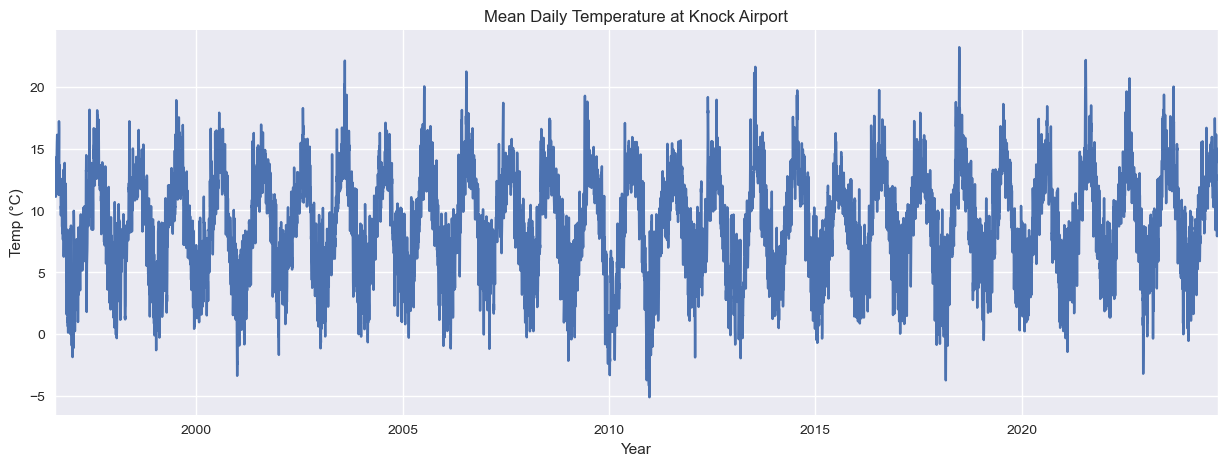

In [49]:
# Plot the daily mean temperature
fig, ax = plt.subplots(figsize = (15, 5))

daily_mean_temp.plot()

plt.xlabel('Year')
plt.ylabel('Temp (°C)')
plt.title('Mean Daily Temperature at Knock Airport')

plt.show()

In [82]:
index_day = weather_df.index.day
temp_by_day = weather_df.groupby(index_day)['temp'].agg(['min', 'max', 'mean'])
print(temp_by_day.head())

      min   max      mean
date                     
1    -6.5  23.3  8.674519
2    -4.9  24.8  8.680720
3    -3.5  24.1  8.575074
4    -4.4  24.2  8.484418
5    -2.8  26.6  8.661144


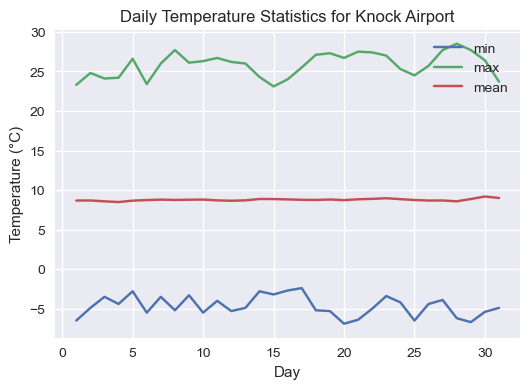

In [ ]:
temp_by_day.plot(figsize = (6,4))

plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature Statistics for Knock Airport')
plt.show()

## Task 3: Plot the Mean Temperature Each Month

In [47]:
# Use resample() to group weather_df to monthly samples
monthly = weather_df.resample('ME')

In [50]:
monthly_mean_temp = monthly['temp'].mean()
monthly_mean_temp

date
1996-07-31    12.650000
1996-08-31    12.949798
1996-09-30    12.175104
1996-10-31     9.724929
1996-11-30     4.912117
                ...    
2024-06-30    11.278194
2024-07-31    12.994489
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     8.200000
Freq: ME, Name: temp, Length: 340, dtype: float64

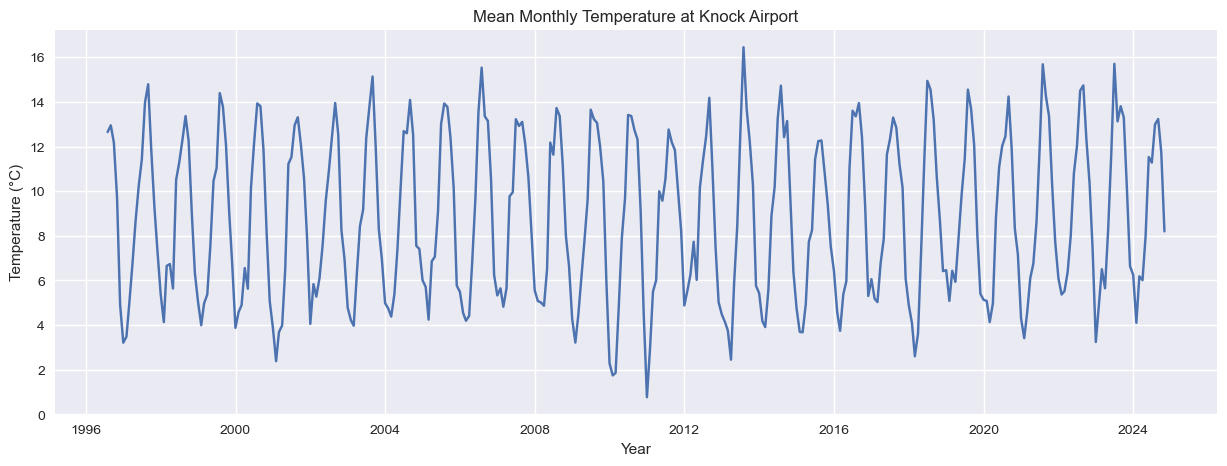

In [69]:
# Plot of the mean monthly temperatures.
fig, ax = plt.subplots(figsize = (15, 5))

plt.plot(monthly_mean_temp)

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Monthly Temperature at Knock Airport')

plt.show()

In [59]:
index_month = weather_df.index.month

In [62]:
temp_by_month = weather_df.groupby(index_month)['temp'].agg(['min', 'max', 'mean'])
print(temp_by_month)

      min   max       mean
date                      
1    -5.5  12.6   4.348502
2    -5.2  14.6   4.686452
3    -6.5  18.4   5.625178
4    -2.0  21.0   7.518934
5    -0.4  24.5  10.212284
6     2.6  28.5  12.366806
7     6.2  27.5  13.650432
8     0.0  27.7  13.561395
9     3.8  25.3  12.092413
10   -0.7  19.6   9.308653
11   -4.4  14.8   6.488077
12   -6.9  13.2   4.760484


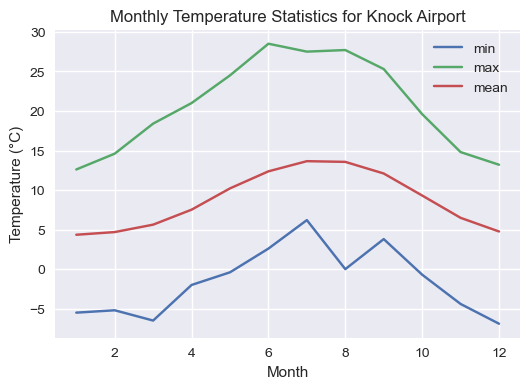

In [66]:

temp_by_month.plot(figsize = (6,4))
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Temperature Statistics for Knock Airport')
plt.show()

# https://app.datacamp.com/learn/courses/visualizing-time-series-data-in-python

In [75]:
index_year = weather_df.index.year
temp_by_year = weather_df.groupby(index_year)['temp'].agg(['min', 'max', 'mean'])
print(temp_by_year.head())

      min   max      mean
date                     
1996 -3.8  20.6  8.599671
1997 -3.8  23.7  9.038664
1998 -3.5  22.3  8.615548
1999 -3.2  25.1  8.624281
2000 -6.7  24.4  8.399158


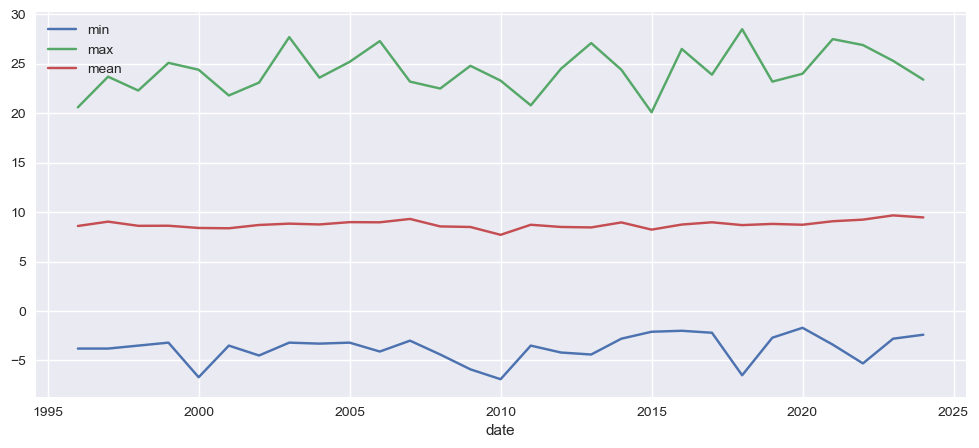

In [ ]:

temp_by_year.plot(figsize = (12, 5))
plt.show()

## Task 4 Plot the Windspeed

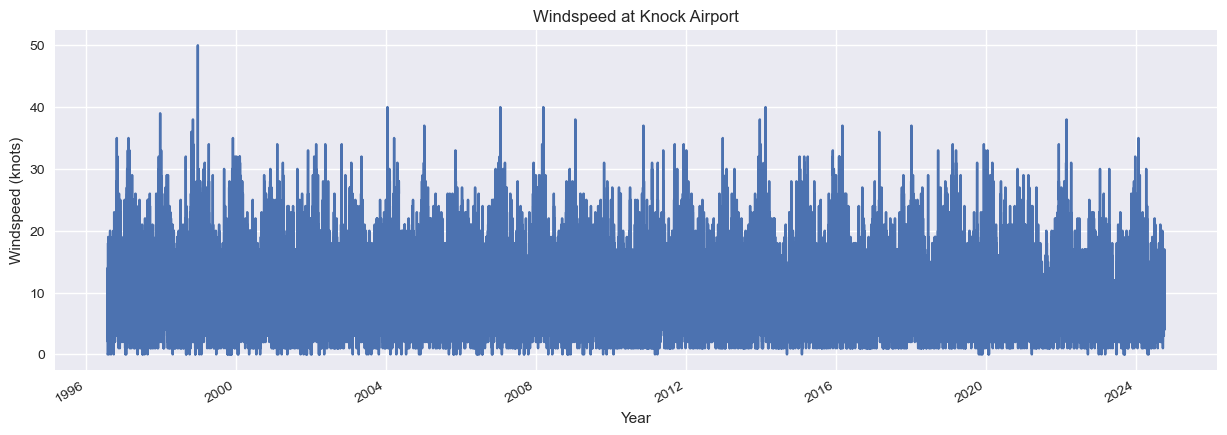

In [41]:
# Plot the windspeed
fig, ax = plt.subplots(figsize = (15, 5))

weather_df['wdsp'].plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Windspeed at Knock Airport')
plt.show()

## Task 5 Plot the Rolling Windspeed (over 24 hours).

The [rolling() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) used to get the rolling mean, also known as the moving average for one or more columns. It is applied to time-series data and allows calculations over conseceutive time intervals depending on the frequency of the time index. It has a parameter of window, which is the size in the number of data points to be included in each calculation. The rolling mean is calculated for each window as it moves through the time-series data. By default it produces NaN for the first few entries. 

__Additional References__

https://sparkbyexamples.com/pandas/pandas-rolling-mean-average-sum/


In [ ]:
# Rolling windspeed
weather_df['rolling_wdsp'] = weather_df['wdsp'].rolling(window='24h').mean()
weather_df

,temp,wdsp,rolling_wind,rolling_wdsp
date,,,,
1996-07-31 08:00:00,11.5,0,0.000000,0.000000
1996-07-31 09:00:00,11.6,0,0.000000,0.000000
1996-07-31 10:00:00,12.9,0,0.000000,0.000000
1996-07-31 11:00:00,14.5,0,0.000000,0.000000
1996-07-31 12:00:00,14.4,0,0.000000,0.000000
...,...,...,...,...
2024-09-30 20:00:00,9.5,5,7.708333,7.708333
2024-09-30 21:00:00,8.6,5,7.500000,7.500000
2024-09-30 22:00:00,8.5,6,7.375000,7.375000


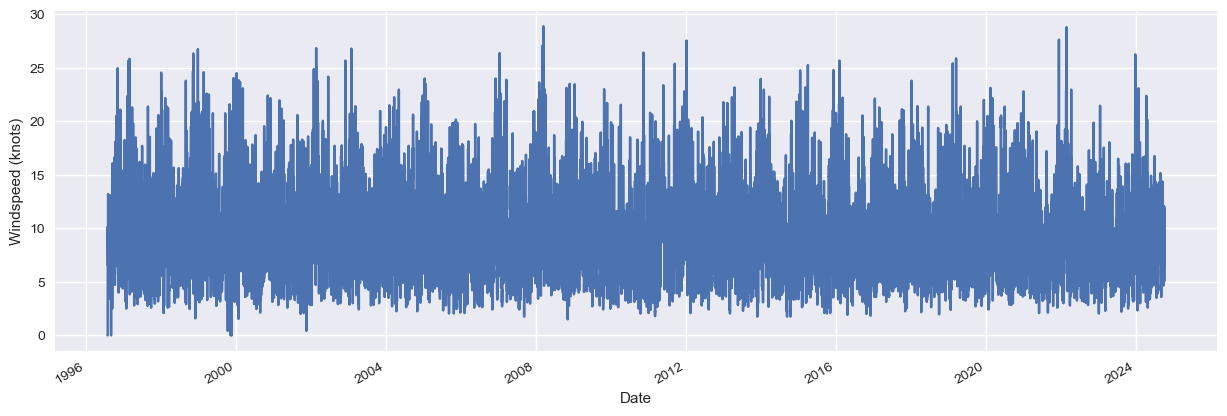

In [133]:
weather_df['rolling_wind'].plot(figsize= (15,5))

plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.show()
# Horrendous

## Task 6 Plot the Max Windspeed for Each Day

In [88]:
# Max windspeed for each day
max_daily_windspeed = daily['wdsp'].max()

max_daily_windspeed

date
1996-07-31     0
1996-08-01    14
1996-08-02    13
1996-08-03    10
1996-08-04    18
              ..
2024-09-27    15
2024-09-28     8
2024-09-29    17
2024-09-30    12
2024-10-01     6
Freq: D, Name: wdsp, Length: 10290, dtype: int32

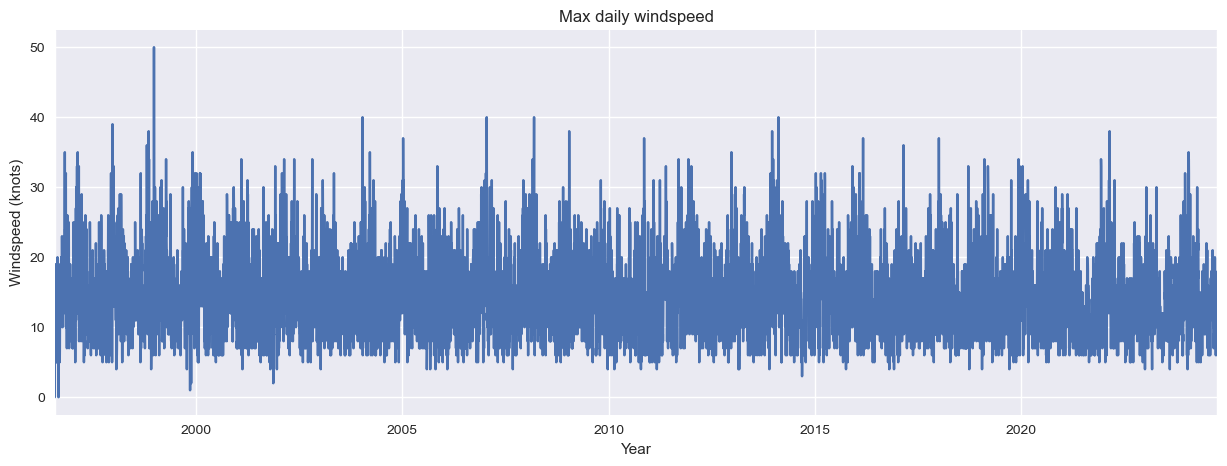

In [33]:
fig, ax = plt.subplots(figsize = (15, 5))
max_daily_windspeed.plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Max daily windspeed')
plt.show()

## Task 7 Plot the Monthly Mean of the Daily Max Windspeeds.

In [34]:
max_daily_windspeed_df = pd.DataFrame(max_daily_windspeed)
max_daily_windspeed_df

,wdsp
date,
1996-07-31,0
1996-08-01,14
1996-08-02,13
1996-08-03,10
1996-08-04,18
...,...
2024-09-27,15
2024-09-28,8
2024-09-29,17


In [35]:
# Monthly mean of the daily max windspeeds

# Resample the daily max windspeeds df
mean_max_monthly = max_daily_windspeed_df.resample('ME')

# Get the Mean of the Max Monthly Windspeed
monthly_mean_max_wdsp = mean_max_monthly['wdsp'].mean()
monthly_mean_max_wdsp.head()


date
1996-07-31     0.000000
1996-08-31    12.516129
1996-09-30    12.266667
1996-10-31    18.193548
1996-11-30    17.133333
Freq: ME, Name: wdsp, dtype: float64

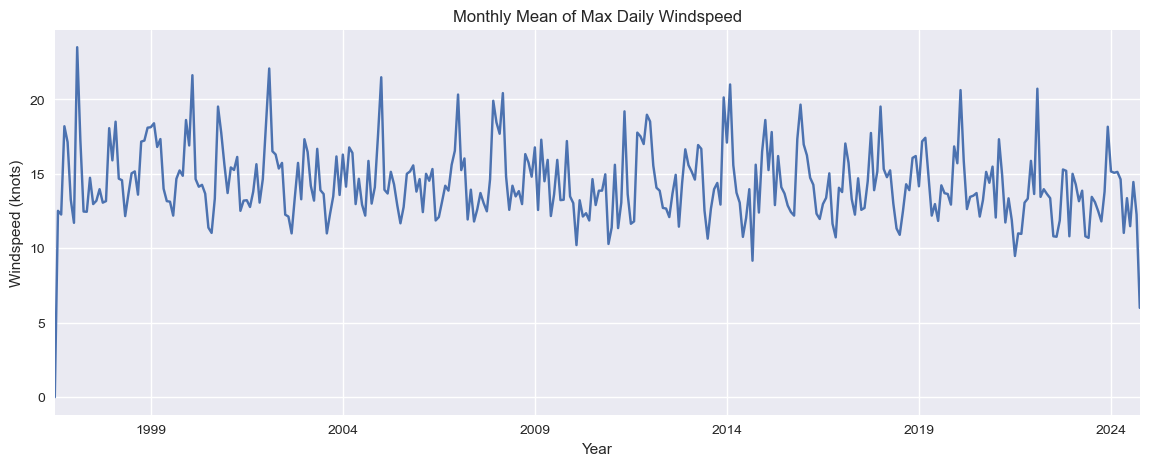

In [36]:
fig, ax = plt.subplots(figsize = (14, 5))
monthly_mean_max_wdsp.plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Monthly Mean of Max Daily Windspeed')
plt.show()

In [ ]:
# What's the windiest month
mean_wind_by_month = weather_df.groupby(index_month)['wdsp'].mean()
print(mean_wind_by_month.head())

date
1    10.473742
2    10.974979
3    10.118856
4     9.383730
5     9.187980
Name: wdsp, dtype: float64


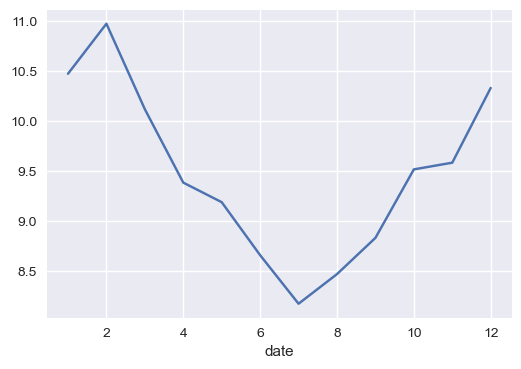

In [ ]:
mean_wind_by_month.plot(figsize = (6,4))

plt.show()

In [106]:
max_wind_by_month = weather_df.groupby(index_month)['wdsp'].max()
print(max_wind_by_month.head())

date
1    40
2    40
3    40
4    34
5    34
Name: wdsp, dtype: int32


<Axes: xlabel='date'>

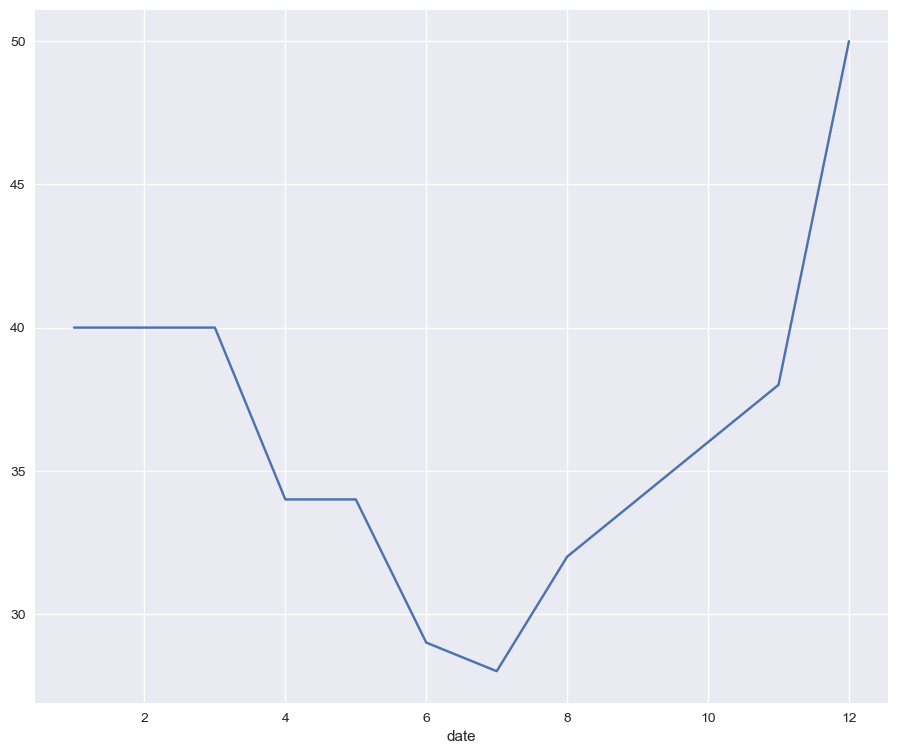

In [108]:
max_wind_by_month.plot()

## Messing

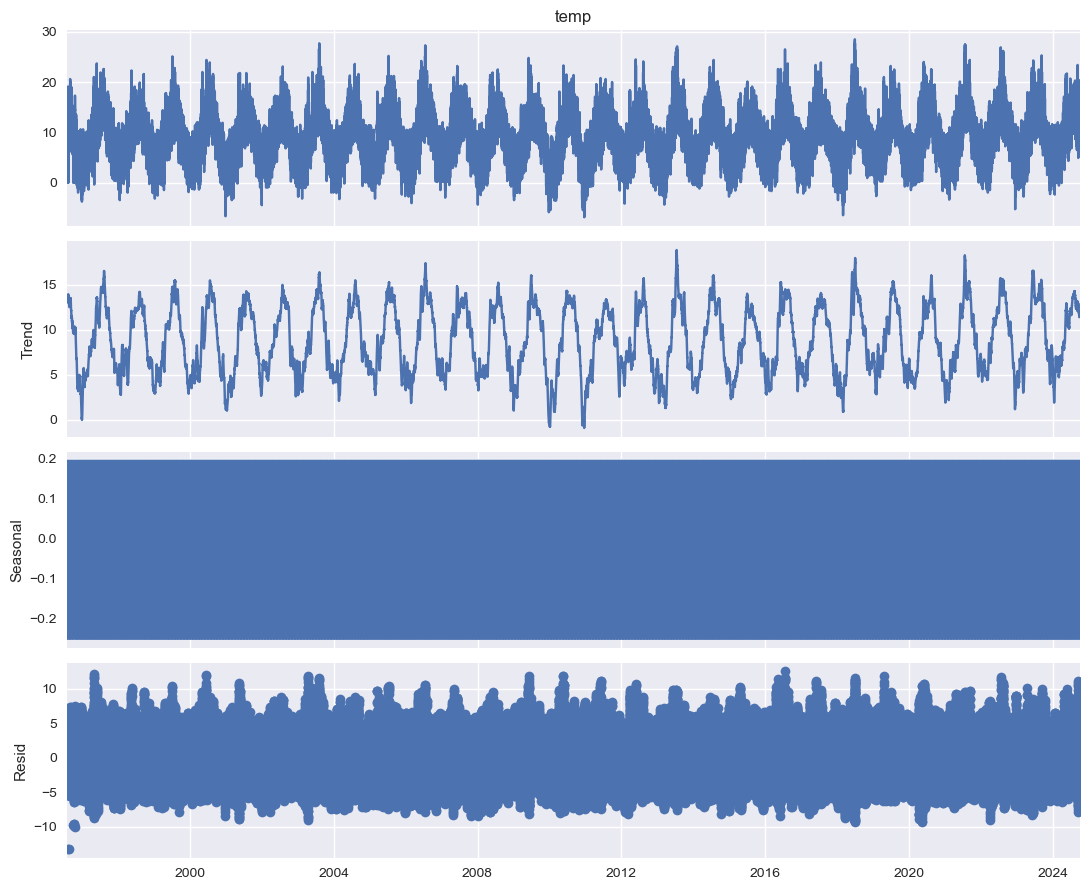

In [37]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 11,9
decomposition = sm.tsa.seasonal_decompose(weather_df['temp'], period= 365)
fig = decomposition.plot()
plt.show()

<Axes: xlabel='date'>

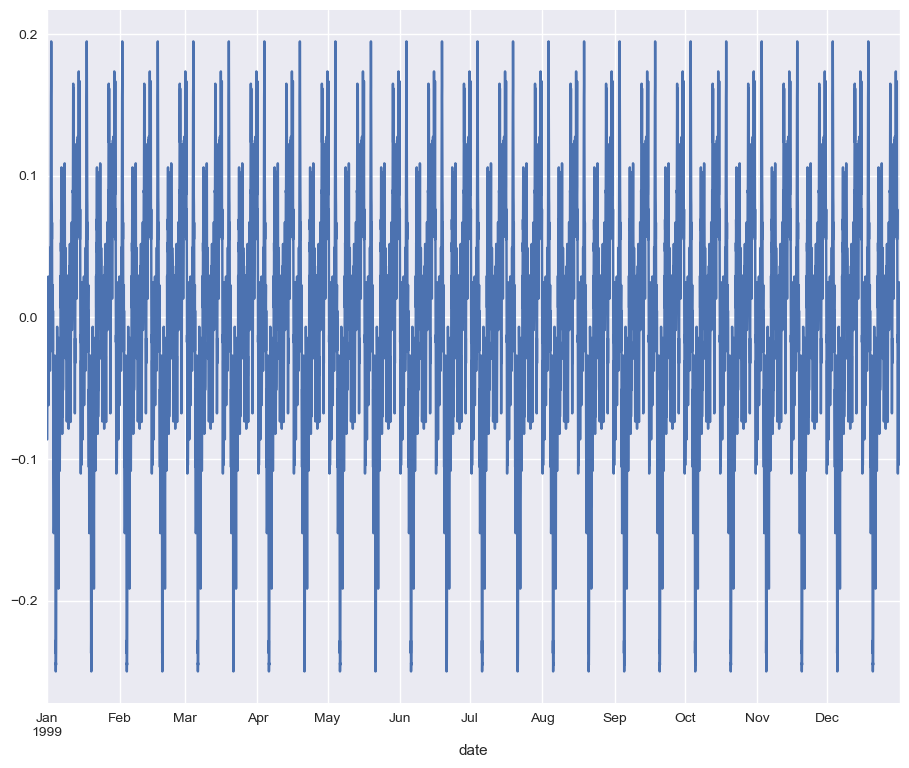

In [98]:
decomposition.seasonal['1999'].plot()

<Axes: xlabel='date'>

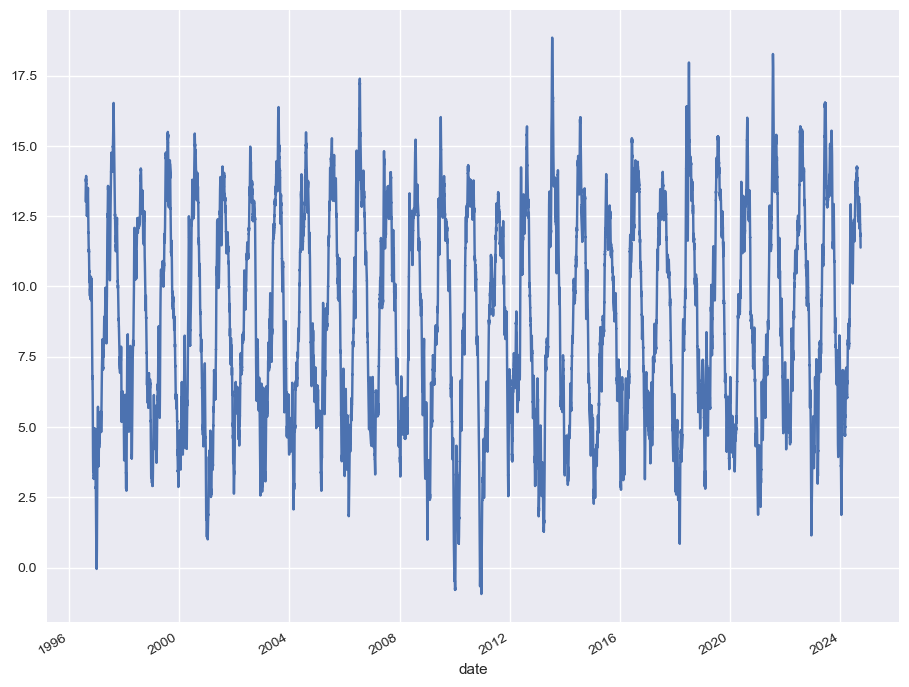

In [39]:
decomposition.trend.plot()

End

***